In [ ]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
dados = pd.read_csv(url)
dados.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
renomear ={ 
    'title' : 'título',
    'genres' : 'gêneros'
}

dados = dados.rename(columns = renomear)
dados.head()


,movieId,título,gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
dados.gêneros

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: gêneros, Length: 9742, dtype: object

In [ ]:
generos = dados.gêneros.str.get_dummies()
dados_filmes = pd.concat([dados , generos], axis = 1)
dados_filmes.head()


,movieId,título,gêneros,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [ ]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters = 3)
grupos_cru = modelo.fit(generos_escalados)
print ( "Grupos:", grupos_cru.labels_)




Grupos: [2 2 0 ... 0 2 0]


In [ ]:
print(generos.columns)
print(grupos_cru.cluster_centers_)


Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.03823997 -0.25858068 -0.22145569 -0.25170979 -0.26911024  0.24487007
  -0.15654737  0.13646545  0.19431272 -0.17083582 -0.07696435 -0.27782722
  -0.10699326  0.02331287 -0.18391357  0.20977074 -0.25915759 -0.47076411
   0.09919741  0.04628178]
 [-0.05917995  0.5084134   0.03434215 -0.23447983 -0.26754108 -0.59548609
   0.46922761 -0.21572361 -0.18122325 -0.11364569  0.20521027  0.714124
   0.10675351 -0.17632711  0.45448464 -0.34553767  0.50554253  1.21090996
  -0.14723097 -0.0642627 ]
 [-0.05917995  0.13111864  1.10931972  1.94078854  2.11684496  0.15929761
  -0.32191099 -0.19993096 -0.59776377  1.20411866 -0.09492563 -0.27642177
   0.31182253  0.31256015 -0.13762909 -0.27269098  0.14136748 -0.47052824
  -

In [ ]:
grupos = pd.DataFrame(grupos_cru.cluster_centers_,  columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.03824,-0.258581,-0.221456,-0.251710,-0.269110,0.244870,-0.156547,0.136465,0.194313,-0.170836,-0.076964,-0.277827,-0.106993,0.023313,-0.183914,0.209771,-0.259158,-0.470764,0.099197,0.046282
1,-0.05918,0.508413,0.034342,-0.234480,-0.267541,-0.595486,0.469228,-0.215724,-0.181223,-0.113646,0.205210,0.714124,0.106754,-0.176327,0.454485,-0.345538,0.505543,1.210910,-0.147231,-0.064263
2,-0.05918,0.131119,1.109320,1.940789,2.116845,0.159298,-0.321911,-0.199931,-0.597764,1.204119,-0.094926,-0.276422,0.311823,0.312560,-0.137629,-0.272691,0.141367,-0.470528,-0.169144,-0.089928


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf2e4d9cc0>,
      dtype=object)

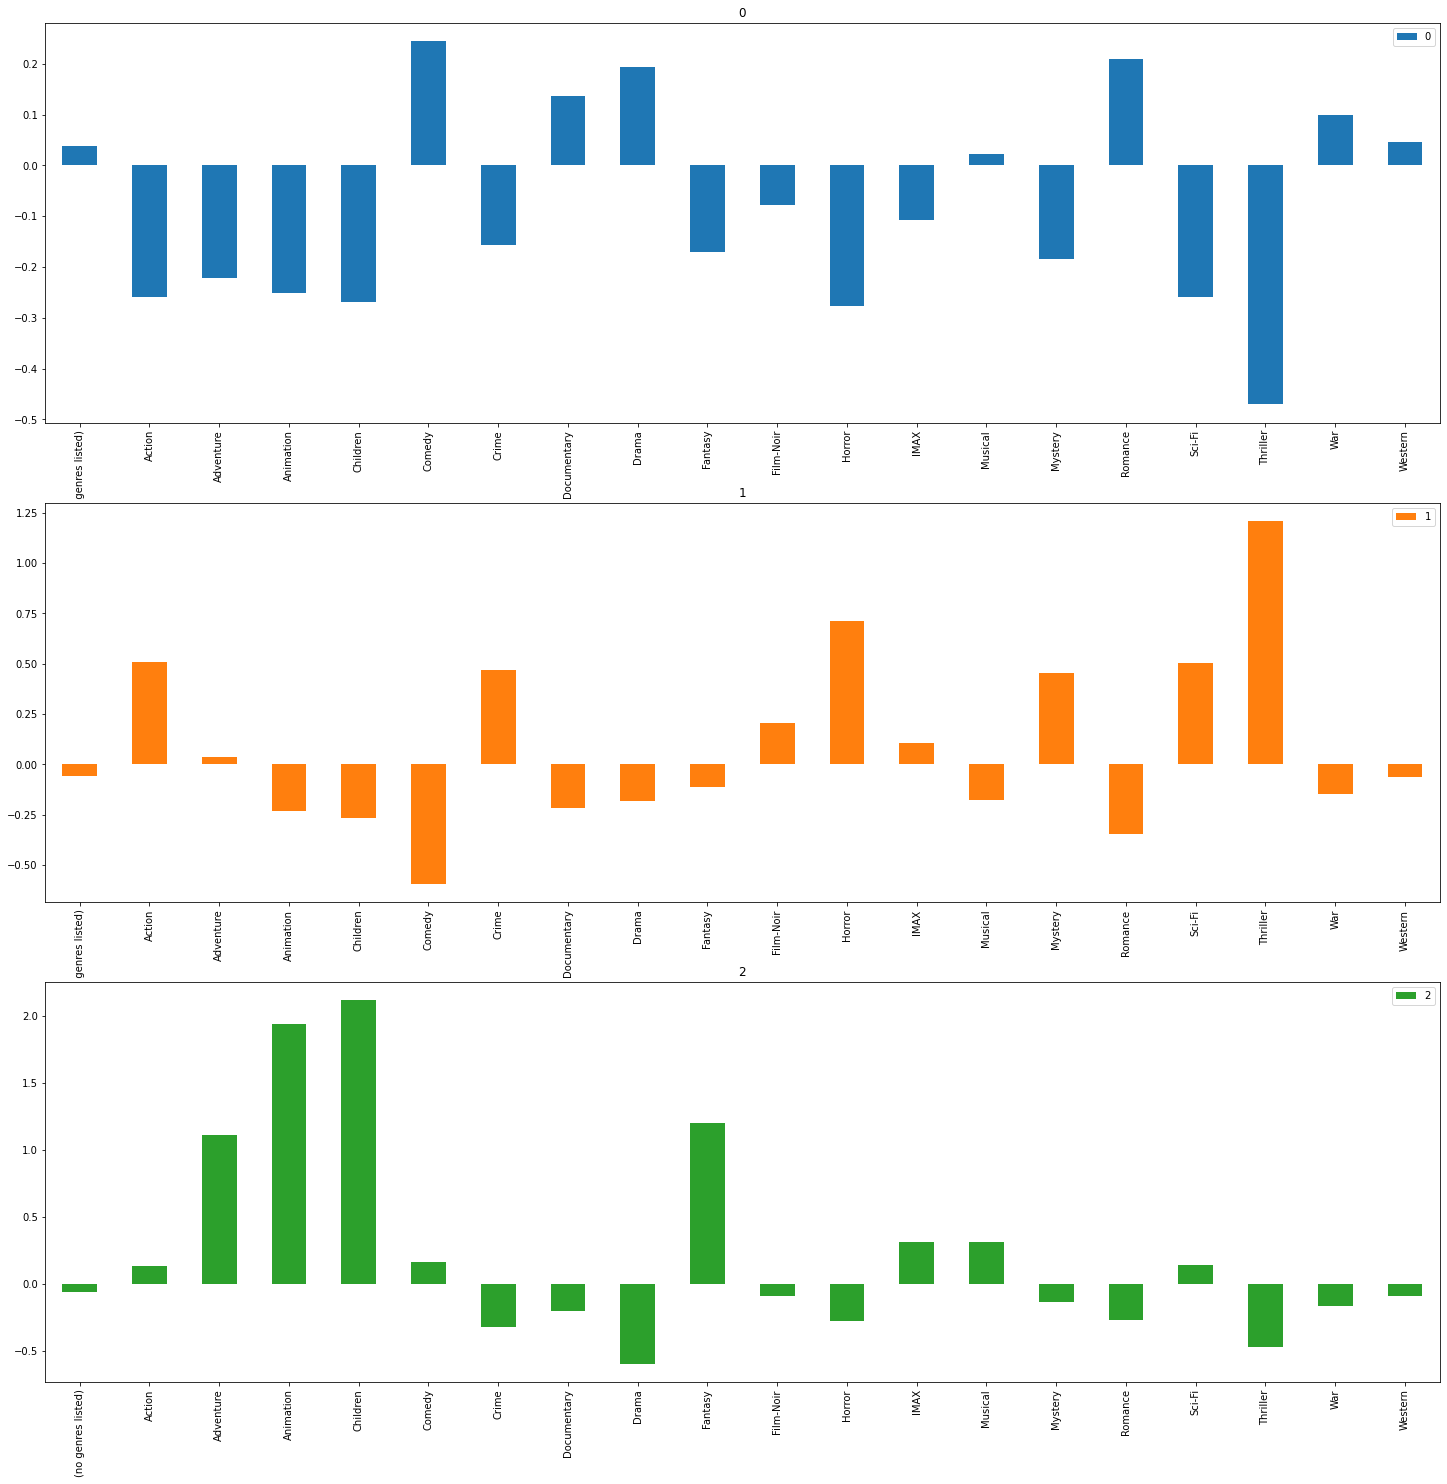

In [ ]:
grupos.transpose().plot.bar(subplots=True ,  figsize=(25, 25), sharex = False )

In [ ]:
grupo_teste = 2
filtro = grupos_cru.labels_ == grupo_teste
dados_filmes[filtro].sample(5)

,movieId,título,gêneros,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9380,163112,Winnie the Pooh Goes Visiting (1971),Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9539,172587,Vacations in Prostokvashino (1980),Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9081,142997,Hotel Transylvania 2 (2015),Animation|Comedy,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1052,1367,101 Dalmatians (1996),Adventure|Children|Comedy,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7871,94160,Dante's Inferno: An Animated Epic (2010),Action|Animation|Fantasy,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


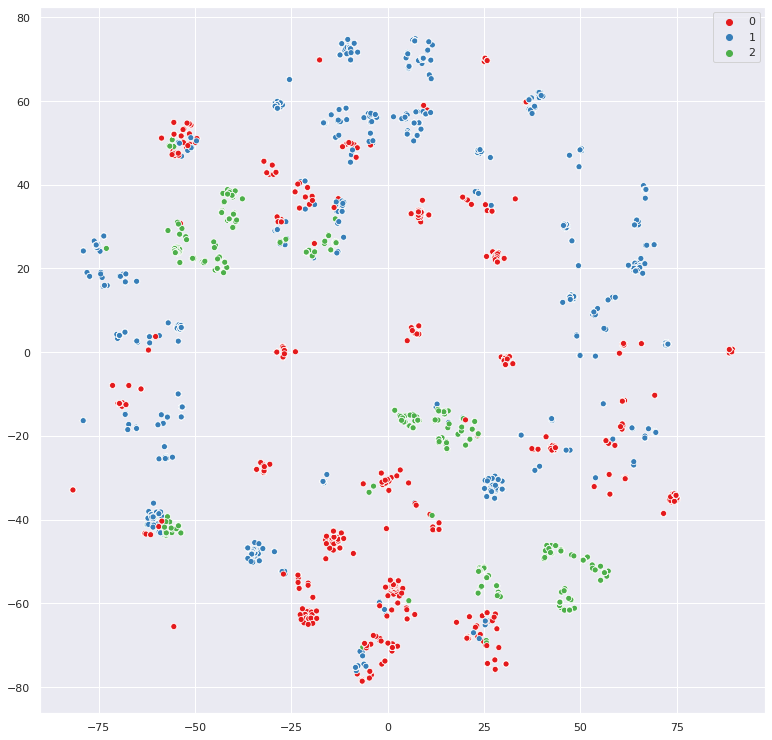

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

In [ ]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters = 20)
grupos_20_cru = modelo.fit(generos_escalados)
print ( "Grupos:", grupos_20_cru.labels_)

Grupos: [ 4 15 12 ...  1 11  0]


In [ ]:
grupos_20 = pd.DataFrame(grupos_20_cru.cluster_centers_,  columns=generos.columns)
grupos_20.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.311278,-0.294232,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.297447,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.449091,-0.202020,-0.132065
1,-0.05918,-0.360667,-0.293761,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.170632,-0.202020,-0.132065
2,-0.05918,-0.154715,-0.267580,-0.217680,-0.238897,-0.526628,0.496789,-0.217489,0.143262,-0.038271,-0.094926,0.525954,-0.128397,-0.188419,4.000218,-0.141832,0.055523,1.186606,-0.202020,-0.132065
3,-0.05918,1.458432,0.886205,-0.258679,-0.270451,-0.564833,-0.308603,-0.217489,-0.442198,-0.294810,-0.094926,-0.326837,-0.128397,-0.188419,-0.249986,-0.272670,-0.334435,1.103778,-0.202020,-0.132065
4,-0.05918,0.031655,1.150551,3.865793,1.803136,-0.063092,-0.335355,-0.217489,-0.562909,3.392017,-0.094926,-0.226714,-0.128397,0.520709,-0.030621,-0.216028,0.287579,-0.442352,-0.102303,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf2b100fd0>,
      dtype=object)

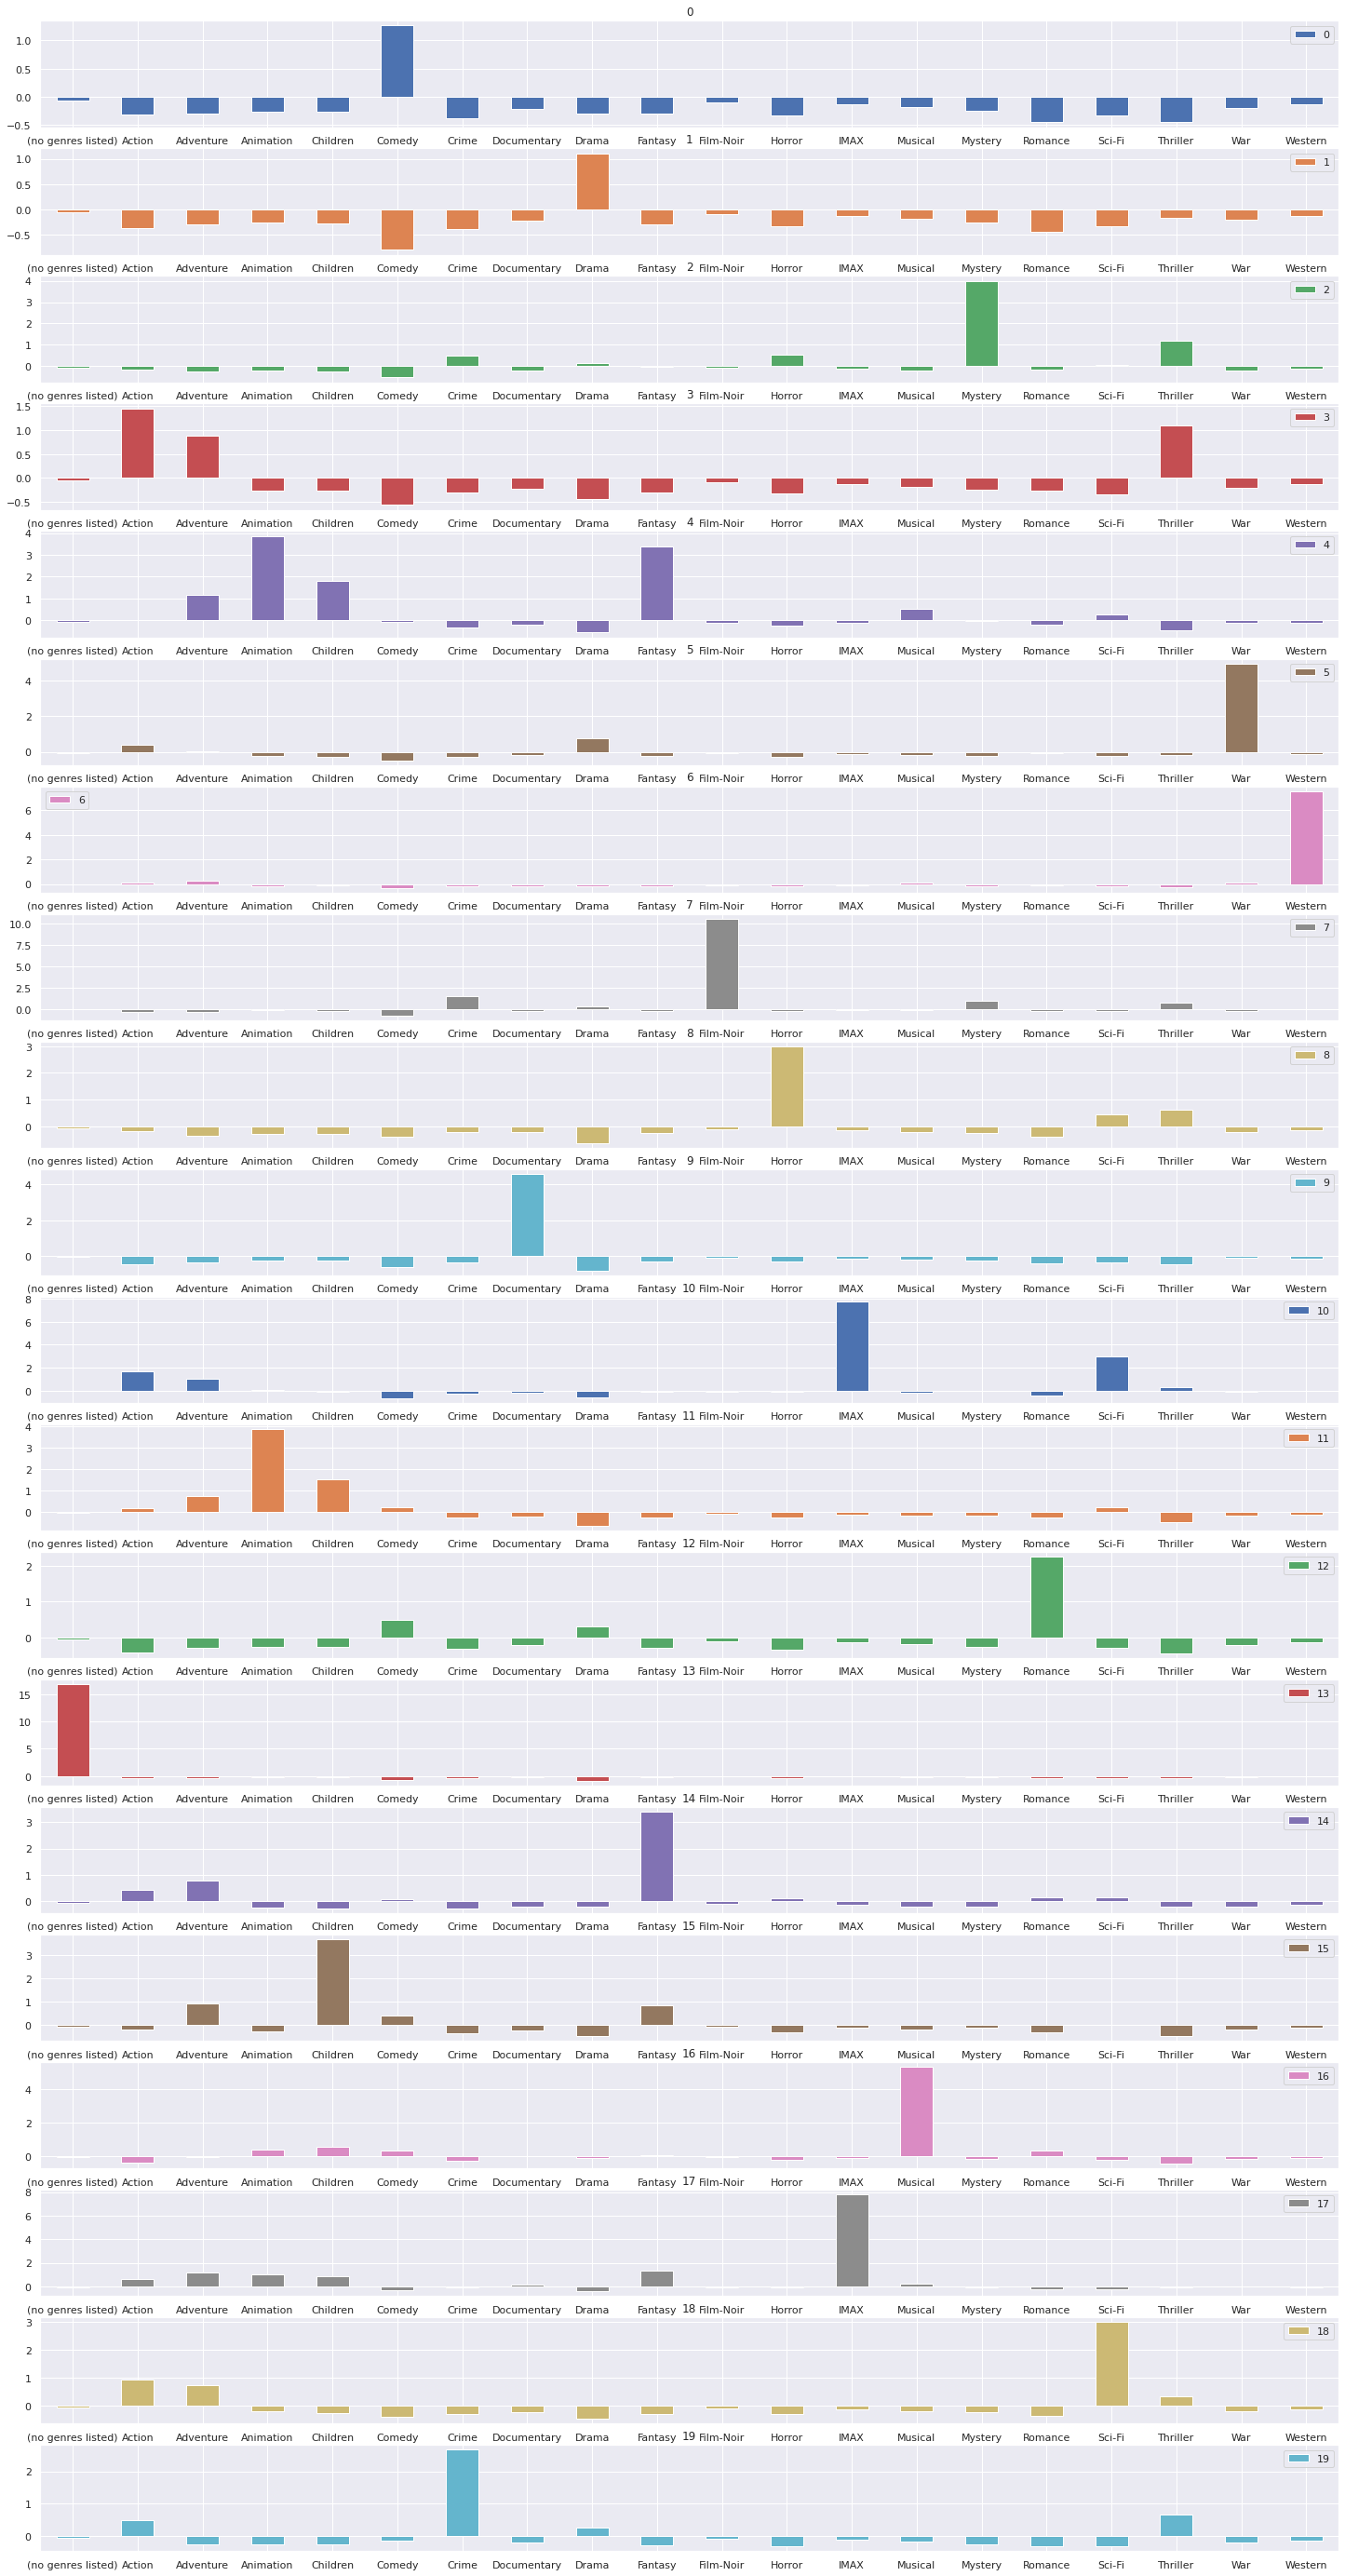

In [ ]:
grupos_20.transpose().plot.bar(subplots=True ,  figsize=(25, 50), sharex = False , rot = 0 )

In [ ]:
grupo_teste = 2
filtro = grupos_20_cru.labels_ == grupo_teste
dados_filmes[filtro].sample(5)

,movieId,título,gêneros,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4315,6303,"Andromeda Strain, The (1971)",Mystery|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9140,147286,The Adventures of Sherlock Holmes and Doctor W...,Crime|Mystery,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
167,198,Strange Days (1995),Action|Crime|Drama|Mystery|Sci-Fi|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0
1743,2338,I Still Know What You Did Last Summer (1998),Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8076,99721,Texas Chainsaw 3D (2013),Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
def kmeans (numero_de_clusters, generos):
  modelo = KMeans(n_clusters= numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [ ]:
kmeans (20, generos_escalados)

[20, 55051.76396330847]

In [ ]:
kmeans (3, generos_escalados)

[3, 166070.99613504743]

In [ ]:
resultado = [kmeans (numero_de_grupos, generos_escalados) for numero_de_grupos in range (1, 41)]
resultado


[[1, 194840.0],
 [2, 179452.06787949486],
 [3, 166081.23121407474],
 [4, 157163.11194831377],
 [5, 146135.84493183214],
 [6, 138820.92117320033],
 [7, 128716.62565254427],
 [8, 120416.80238230035],
 [9, 110726.20833633703],
 [10, 101872.64626760622],
 [11, 94707.18297699218],
 [12, 86882.20131555827],
 [13, 80453.04665421236],
 [14, 71970.7112920517],
 [15, 70187.85274419923],
 [16, 64462.934062518994],
 [17, 60643.98307671372],
 [18, 59038.71247653561],
 [19, 56881.352187869954],
 [20, 55226.0186954343],
 [21, 54003.76013157171],
 [22, 51286.477905351065],
 [23, 50487.52842408587],
 [24, 49271.73022968294],
 [25, 47908.07246314868],
 [26, 47254.399518046164],
 [27, 45636.23444590698],
 [28, 44848.95430007731],
 [29, 43272.53189957248],
 [30, 42504.60130453393],
 [31, 42340.626493459116],
 [32, 41295.91111587724],
 [33, 39619.07957701343],
 [34, 39250.711515723546],
 [35, 38601.68852759426],
 [36, 37630.82498886508],
 [37, 37248.78936179399],
 [38, 37358.03767059158],
 [39, 36623.23523

In [ ]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179452.067879
2,3,166081.231214
3,4,157163.111948
4,5,146135.844932
5,6,138820.921173
6,7,128716.625653
7,8,120416.802382
8,9,110726.208336
9,10,101872.646268


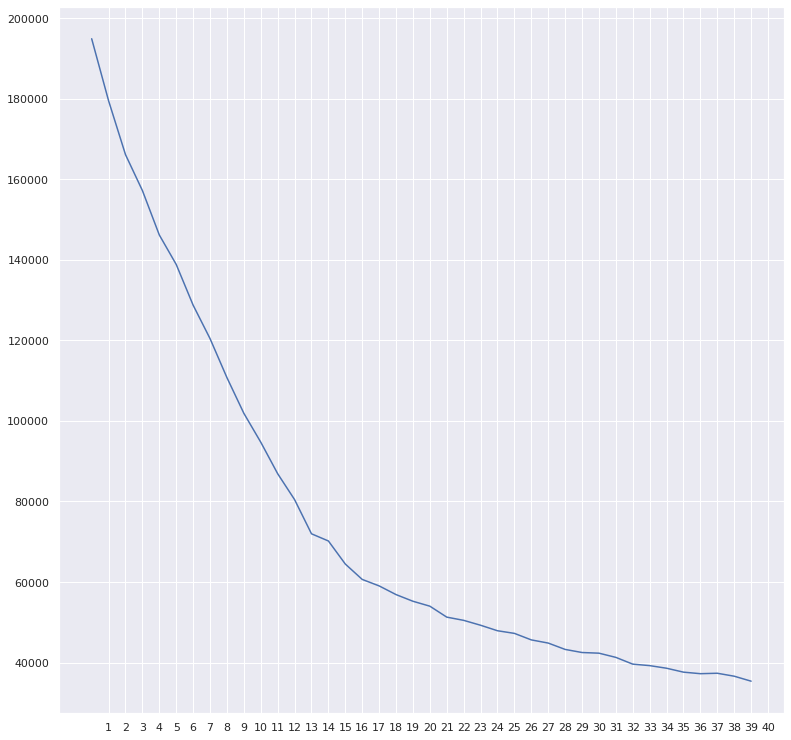

In [ ]:
resultado.inertia.plot(xticks = resultado.grupos)

In [ ]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters = 15)
grupos = modelo.fit(generos_escalados)
grupos = pd.DataFrame(grupos.cluster_centers_,  columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,0.451246,-0.272255,-0.229663,-0.262475,-0.187118,2.669289,-0.217489,0.243729,-0.250346,-0.094926,-0.324022,-0.128397,-0.188419,0.305317,-0.285139,-0.301022,0.745498,-0.202020,-0.132065
1,-0.05918,-0.301804,-0.298913,-0.138095,-0.270451,1.262425,-0.374632,-0.217489,-0.318289,-0.151824,-0.094926,-0.334055,-0.128397,-0.188419,-0.204340,-0.442633,-0.334435,-0.446029,-0.202020,-0.132065
2,-0.05918,0.402104,0.034527,-0.200424,-0.259242,-0.467113,-0.297244,-0.190284,0.747226,-0.242736,-0.094926,-0.305855,-0.128397,-0.188419,-0.213968,-0.053385,-0.231129,-0.198602,4.950012,-0.132065
3,-0.05918,-0.422111,-0.283964,-0.221673,-0.270451,0.456357,-0.329941,-0.217489,0.316883,-0.078292,-0.094926,-0.334055,-0.128397,-0.188419,-0.128651,2.259206,-0.329011,-0.390268,-0.202020,-0.132065
4,-0.05918,-0.125338,-0.299447,-0.127528,-0.270451,-0.778610,-0.374632,-0.217489,0.783349,-0.181618,-0.094926,-0.334055,-0.128397,-0.188419,0.083226,-0.441152,-0.334435,0.162618,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf2a2f52e8>,
      dtype=object)

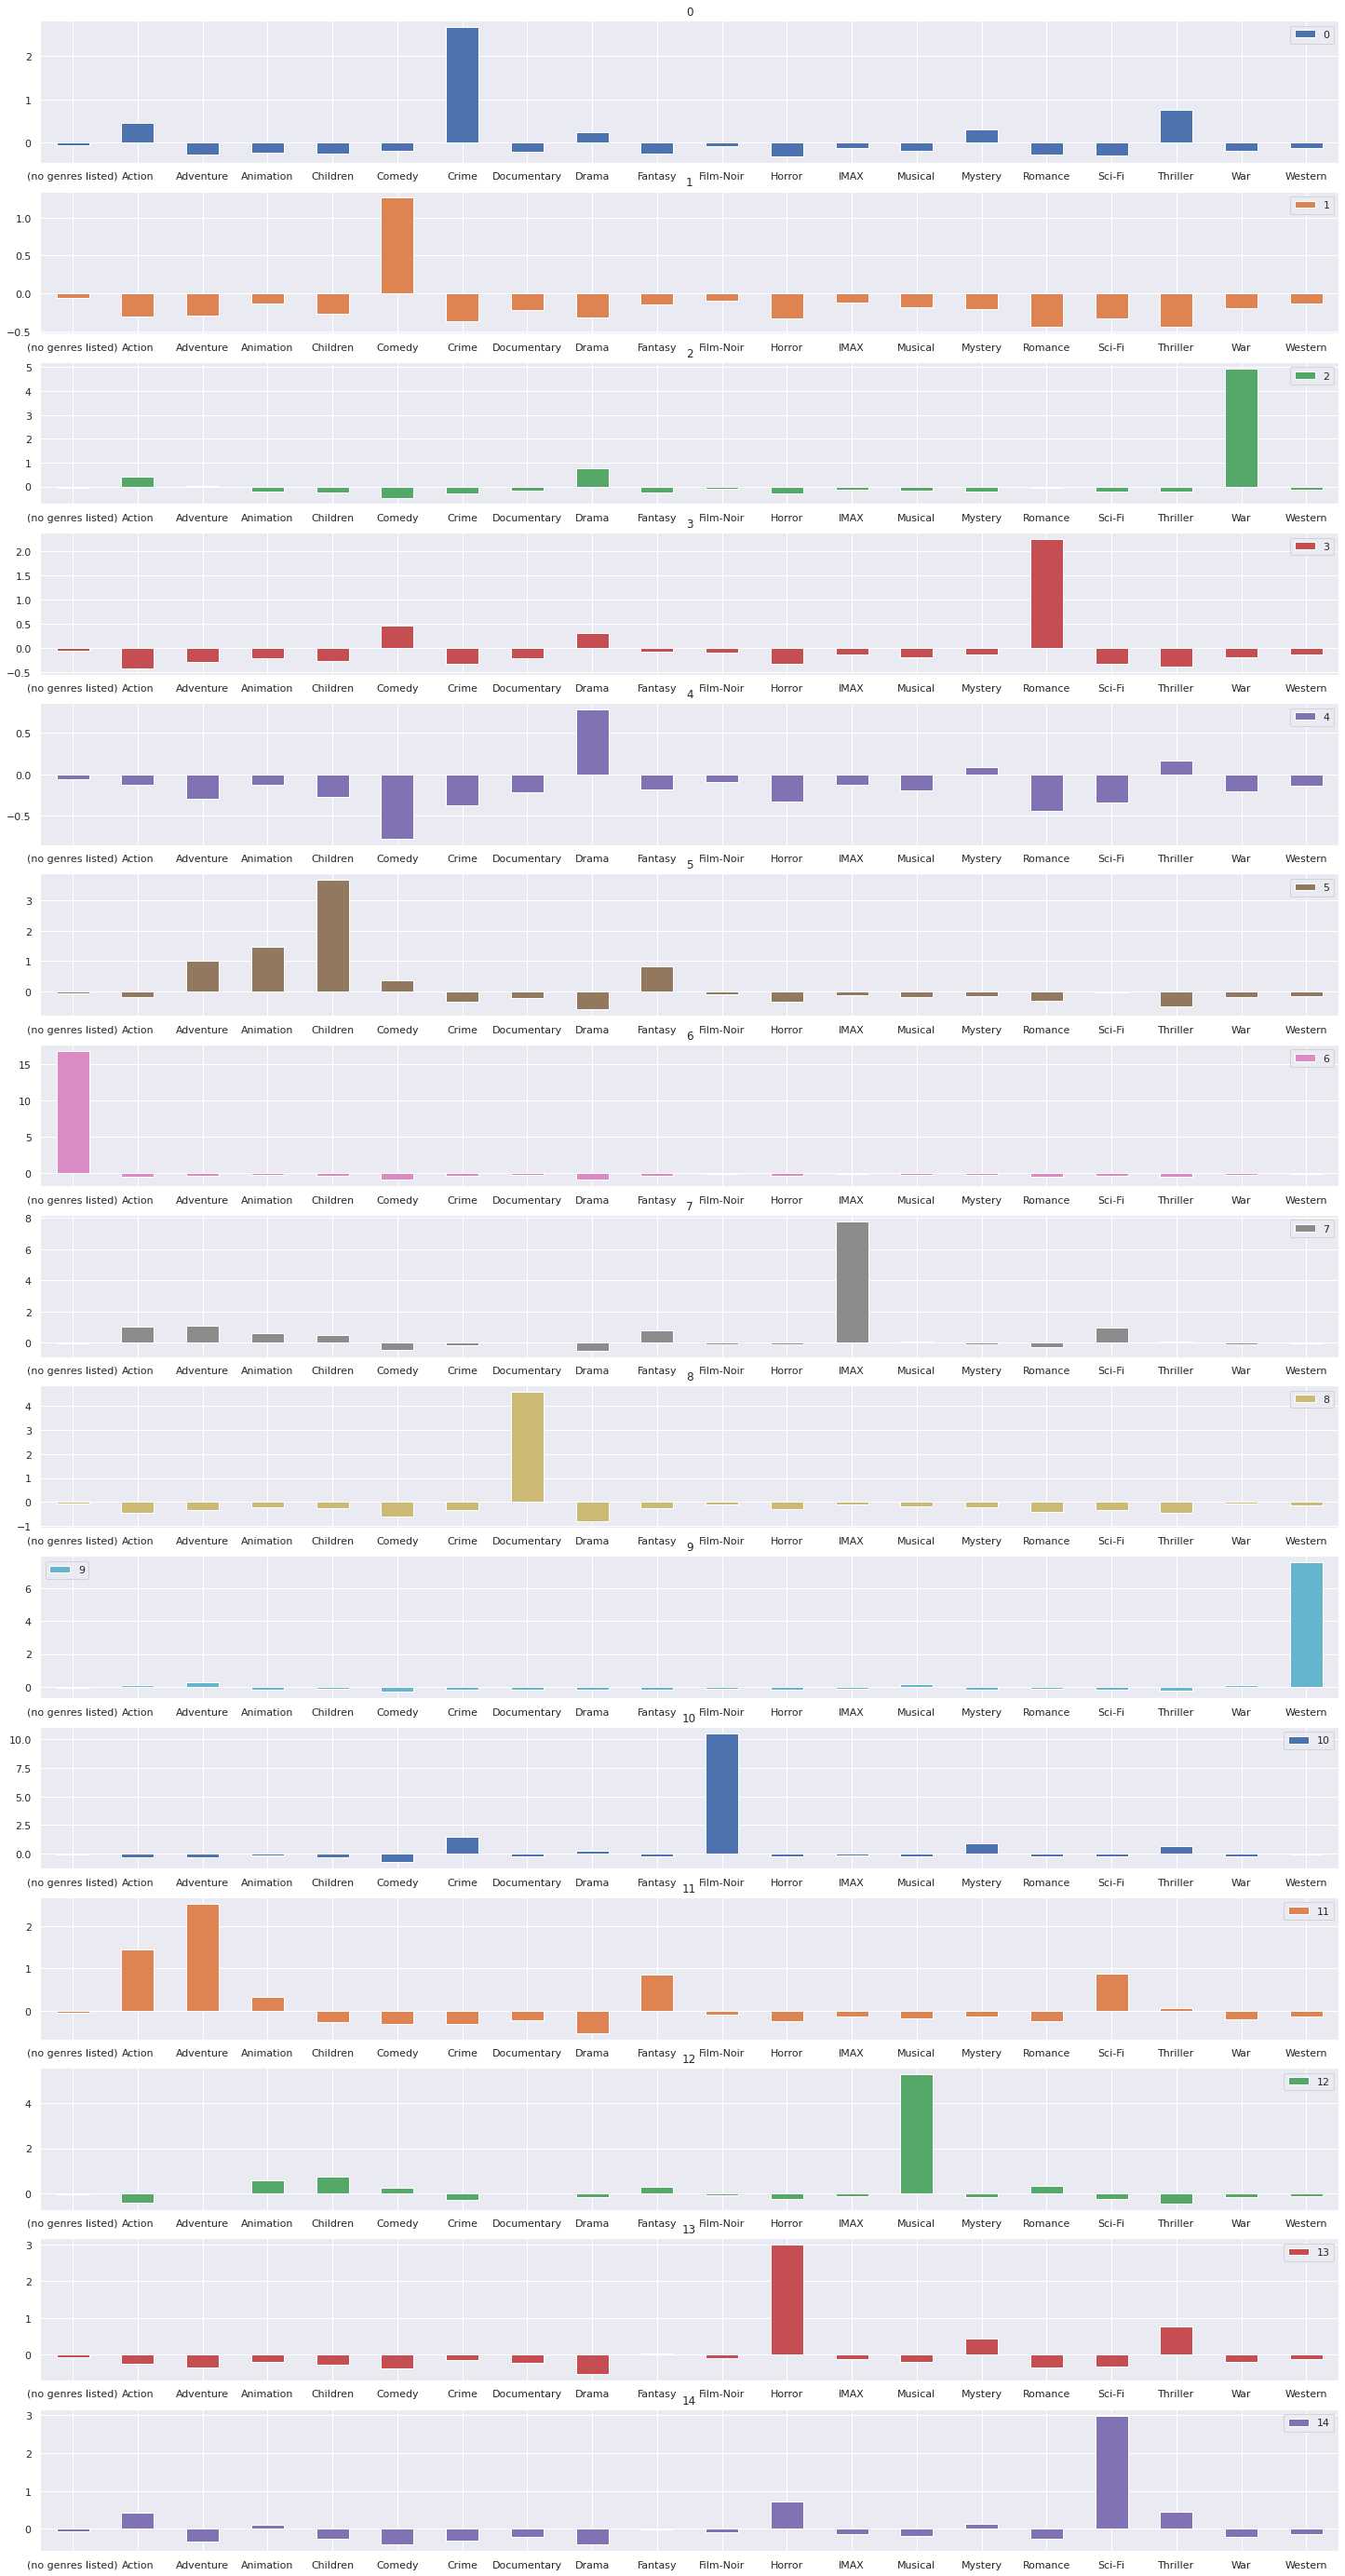

In [ ]:
grupos.transpose().plot.bar(subplots=True ,  figsize=(25, 50), sharex = False , rot = 0 )

In [ ]:
grupo_teste = 8
filtro = modelo.labels_ == grupo_teste
dados_filmes[filtro].sample(20)

,movieId,título,gêneros,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8383,109687,Particle Fever (2013),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9021,140561,Jeff Ross Roasts Criminals: Live at Brazos Cou...,Comedy|Documentary,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
604,759,Maya Lin: A Strong Clear Vision (1994),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8892,134524,Turtle Power: The Definitive History of the Te...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5910,33677,Rock School (2005),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8081,99846,Everything or Nothing: The Untold Story of 007...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6404,50851,Cocaine Cowboys (2006),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5728,27899,What the #$*! Do We Know!? (a.k.a. What the Bl...,Comedy|Documentary|Drama,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4853,7256,Touching the Void (2003),Adventure|Documentary,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3923,5513,Martin Lawrence Live: Runteldat (2002),Comedy|Documentary,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
modelo = AgglomerativeClustering(n_clusters= 15)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5,  0, 13, ...,  2,  5,  2])

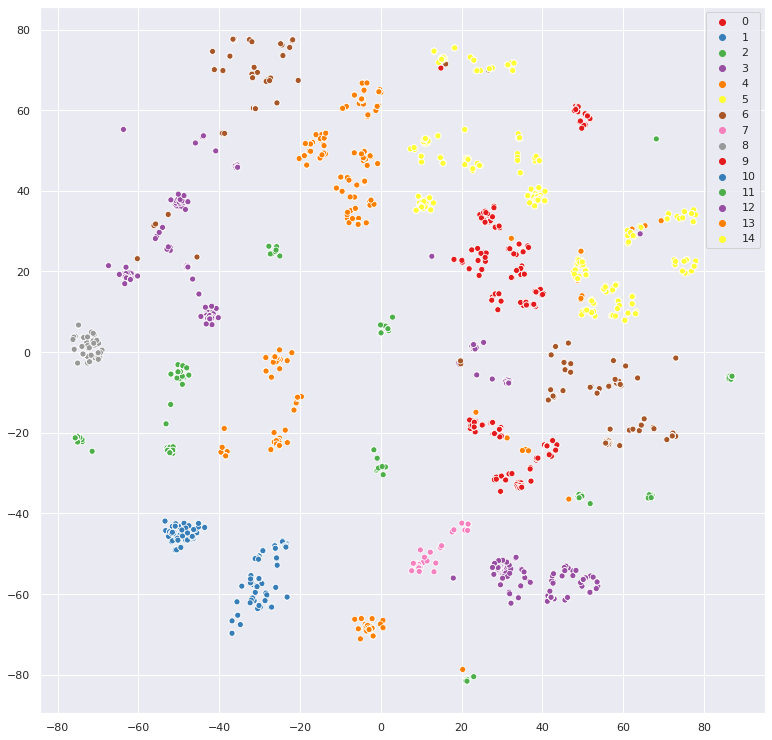

In [ ]:
visualizacao = tsne.fit_transform(generos_escalados)
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos,
               palette=sns.color_palette('Set1', 15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf2969e0f0>,
      dtype=object)

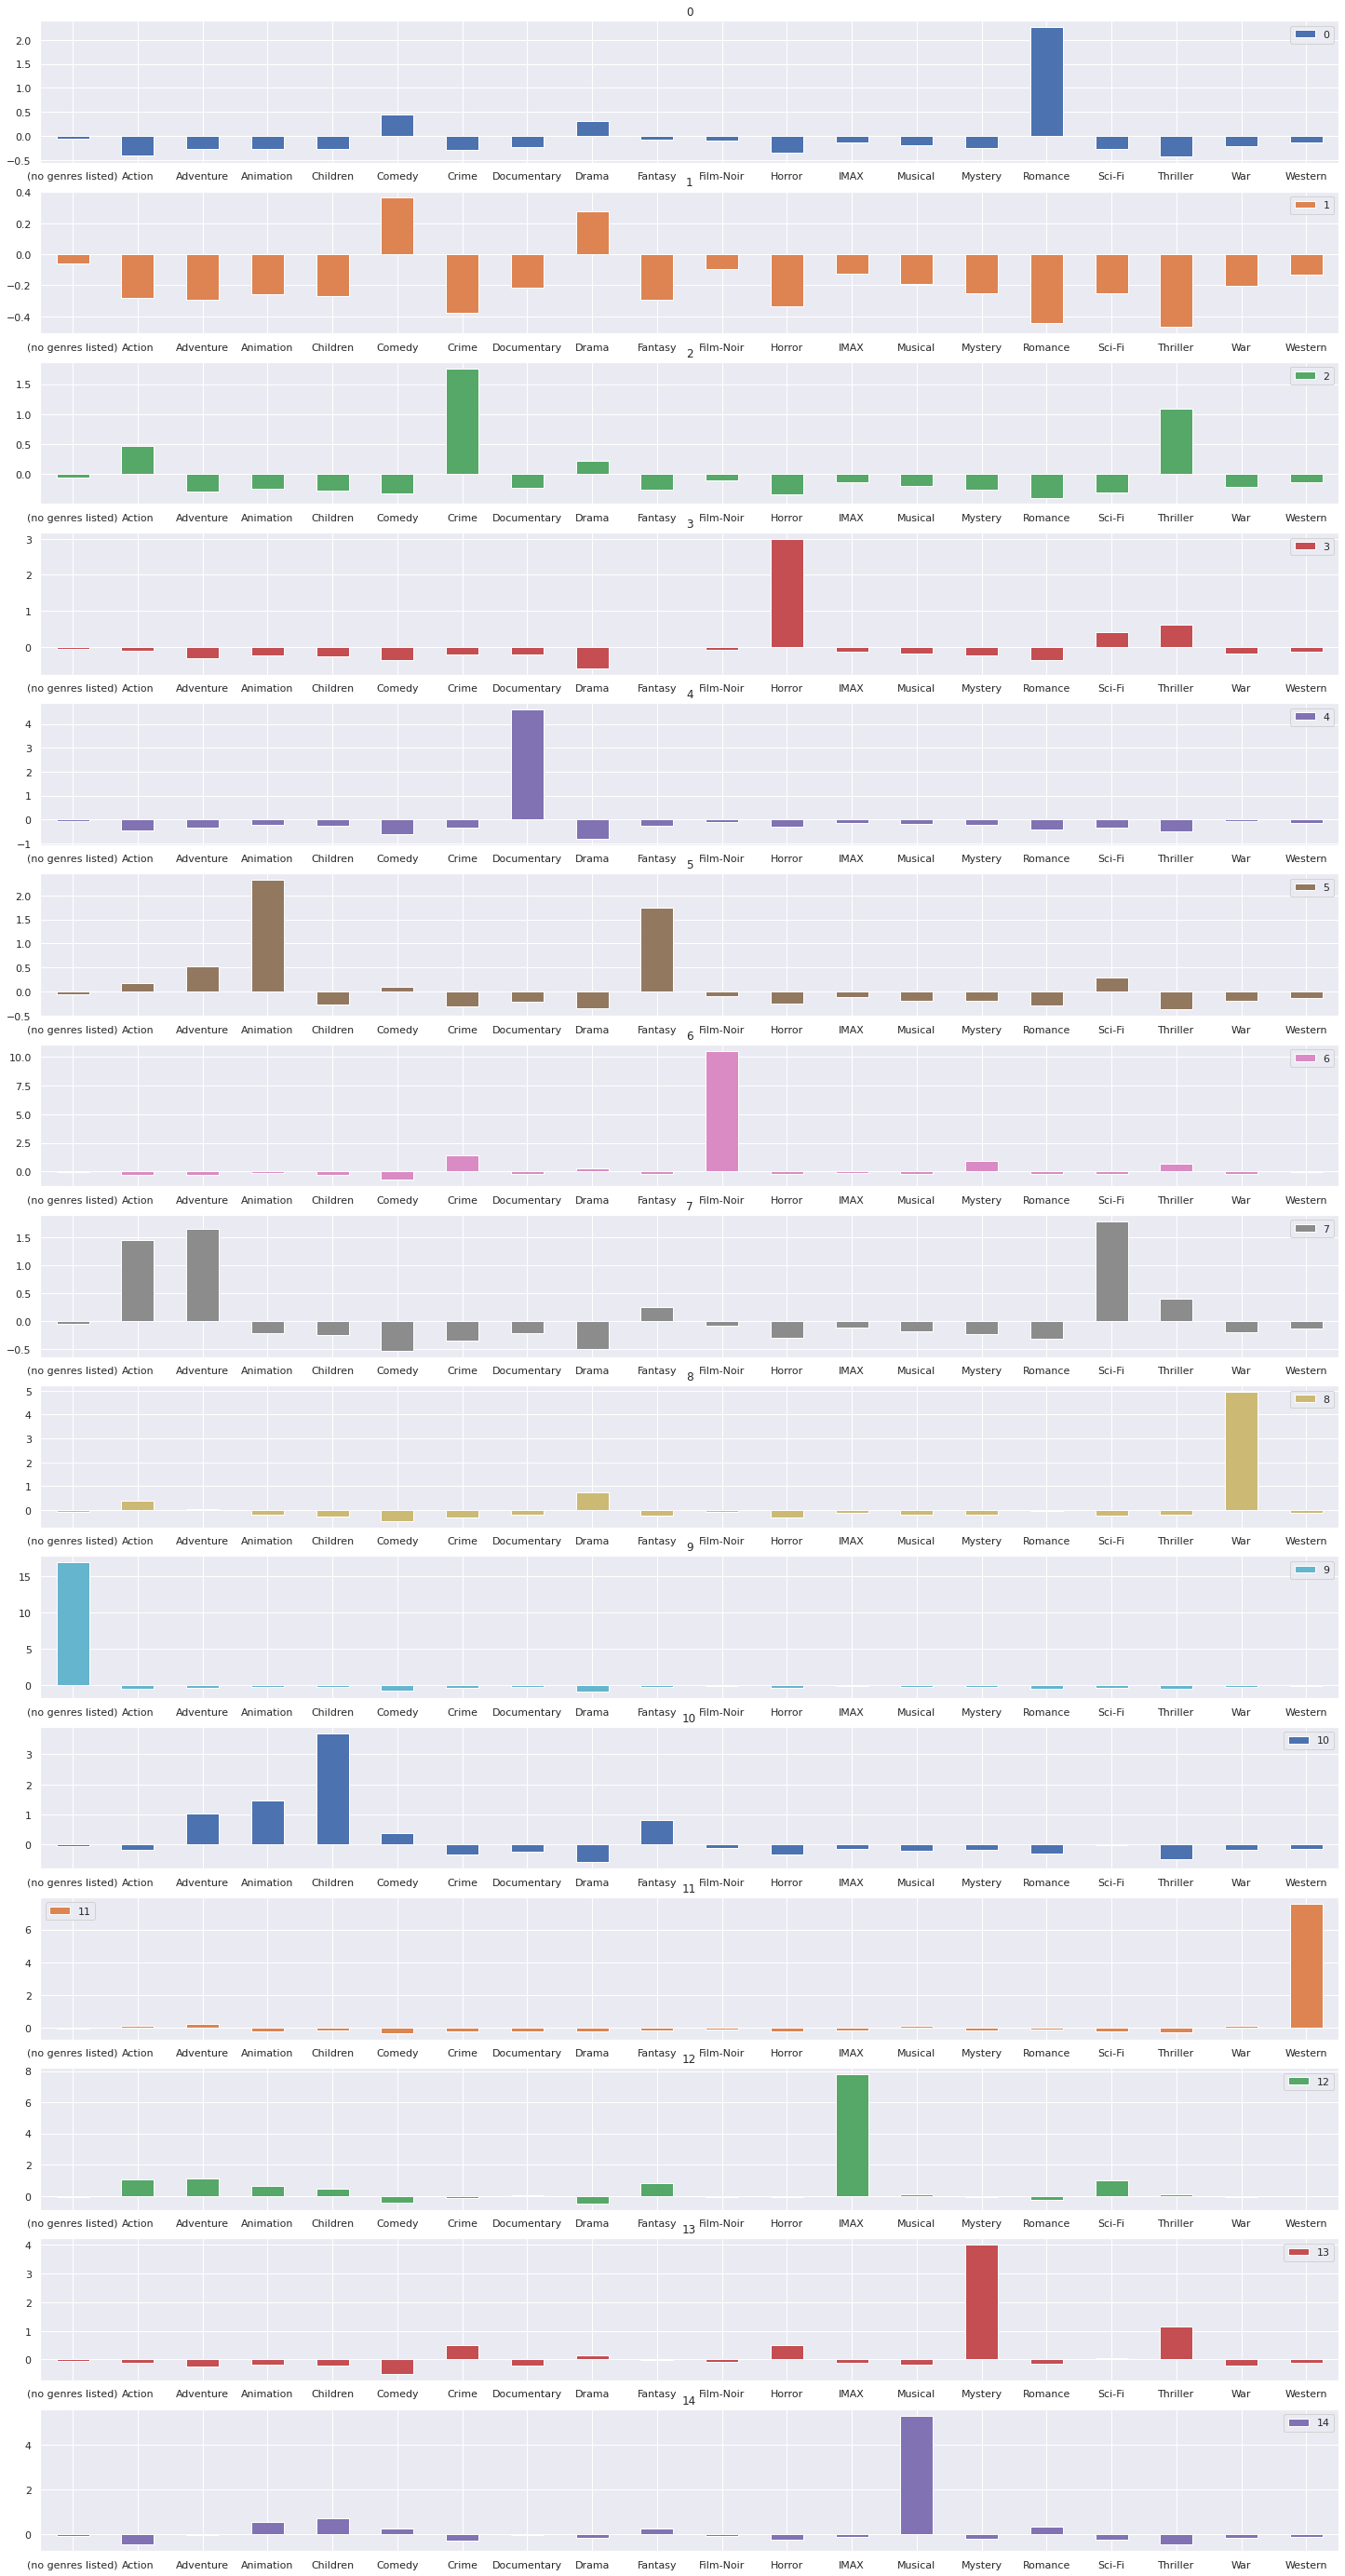

In [ ]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters = 15)
grupos = modelo.fit(generos_escalados)
grupos = pd.DataFrame(grupos.cluster_centers_,  columns=generos.columns)
grupos.transpose().plot.bar(subplots=True ,  figsize=(25, 50), sharex = False , rot = 0 )

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
matriz_de_distancia = linkage (grupos)
matriz_de_distancia

array([[ 0.        ,  1.        ,  2.71748357,  2.        ],
       [ 2.        , 15.        ,  2.83379262,  3.        ],
       [ 5.        , 16.        ,  3.52409881,  4.        ],
       [ 7.        , 17.        ,  3.64634259,  5.        ],
       [ 3.        , 18.        ,  3.75425843,  6.        ],
       [10.        , 19.        ,  4.24038067,  7.        ],
       [13.        , 20.        ,  4.58979494,  8.        ],
       [ 4.        , 21.        ,  5.03435257,  9.        ],
       [ 8.        , 22.        ,  5.31711143, 10.        ],
       [14.        , 23.        ,  5.75631311, 11.        ],
       [11.        , 24.        ,  7.8069309 , 12.        ],
       [12.        , 25.        ,  8.10898019, 13.        ],
       [ 6.        , 26.        , 10.74808633, 14.        ],
       [ 9.        , 27.        , 17.03815625, 15.        ]])

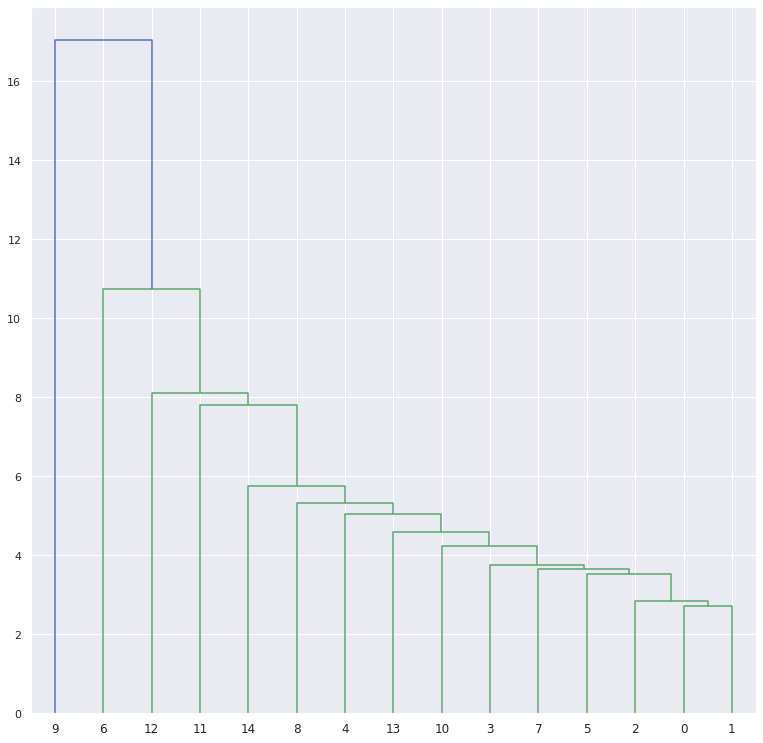

In [ ]:
dendograma = dendrogram (matriz_de_distancia)